# Exploratory Data Analysis of Covid Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
bc_df = pd.read_csv('../data/processed/British Columbia_combined.csv', index_col='Date', parse_dates=['Date'])
bc_df.head()

,num_new_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm,num_deaths,daily_deaths,deaths_ma_7,deaths_ma_30,deaths_ewm,mortality_rate,province
Date,,,,,,,,,,,,
2020-01-22,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,British Columbia
2020-01-23,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,British Columbia
2020-01-24,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,British Columbia
2020-01-25,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,British Columbia
2020-01-26,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,British Columbia


### Overall trends in number of cases and deaths

In [7]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)
  # Set the x-axis label
  axes.set_xlabel(xlabel)
  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)
  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)


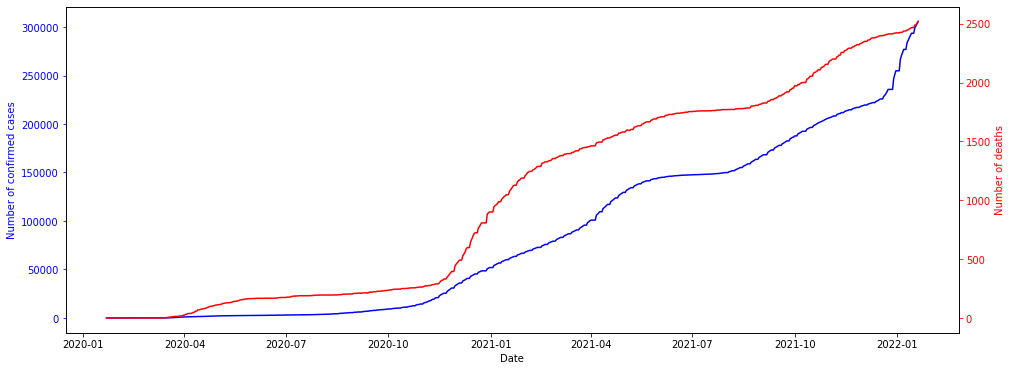

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, bc_df.index, bc_df['num_new_cases'], "blue", "Date", "Number of confirmed cases")
# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()
# Plot the relative temperature data in red
plot_timeseries(ax2, bc_df.index, bc_df['num_deaths'], "red", "Date", "Number of deaths")
plt.show()

The period in December sees an exponential growth in number of confirmed cases; however, number of deaths doesnt seem to grow in a similar rate. To confirm that, lets further dig deep into period starting from October 2021. This time, we have a look at number of new confirmed cases and deaths on a daily basis.

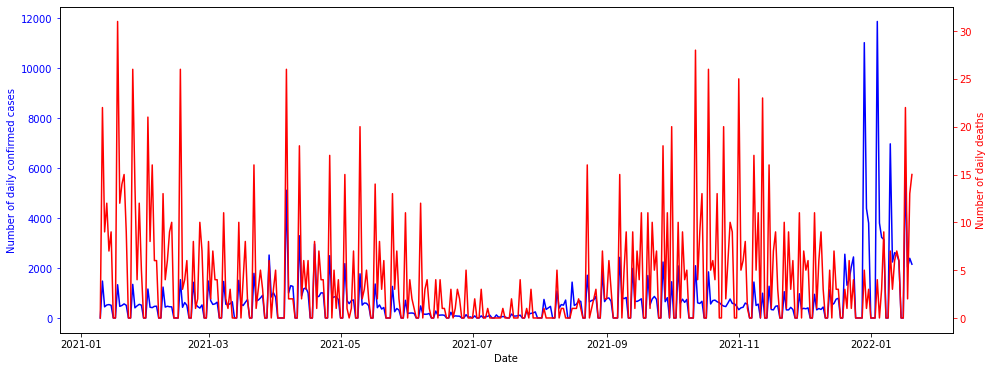

In [13]:
start_date = "2021-01-10"
end_date = bc_df.index.max().date()
filtered_bc_df = bc_df[start_date:end_date]

fig, ax = plt.subplots(figsize=(16,6))
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, filtered_bc_df.index, filtered_bc_df['daily_new_cases'], "blue", "Date", "Number of daily confirmed cases")
# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()
# Plot the relative temperature data in red
plot_timeseries(ax2, filtered_bc_df.index, filtered_bc_df['daily_deaths'], "red", "Date", "Number of daily deaths")
plt.show()

We observe huge fluctuations when we look at the absolute value of new cases and deaths on a daily basis. To smoothen it, lets look at moving average of confirmed cases and deaths over 7 day and 30 day periods.

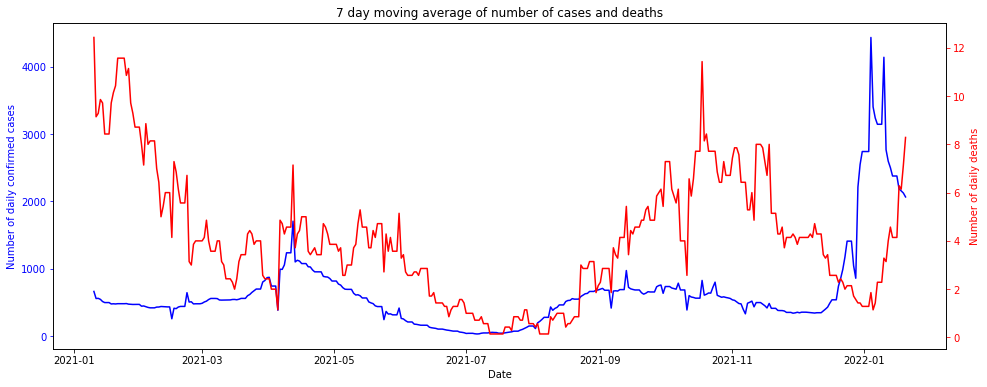

In [18]:
fig, ax = plt.subplots(figsize=(16,6))
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, filtered_bc_df.index, filtered_bc_df['new_cases_ma_7'], "blue", "Date", "Number of daily confirmed cases")
# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()
# Plot the relative temperature data in red
plot_timeseries(ax2, filtered_bc_df.index, filtered_bc_df['deaths_ma_7'], "red", "Date", "Number of daily deaths")
ax.set_title("7 day moving average of number of cases and deaths")
plt.show()

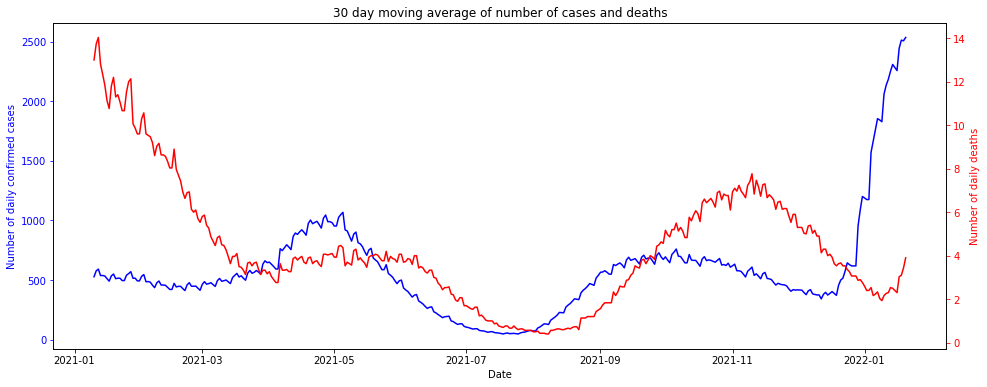

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, filtered_bc_df.index, filtered_bc_df['new_cases_ma_30'], "blue", "Date", "Number of daily confirmed cases")
# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()
# Plot the relative temperature data in red
plot_timeseries(ax2, filtered_bc_df.index, filtered_bc_df['deaths_ma_30'], "red", "Date", "Number of daily deaths")
ax.set_title("30 day moving average of number of cases and deaths")
plt.show()

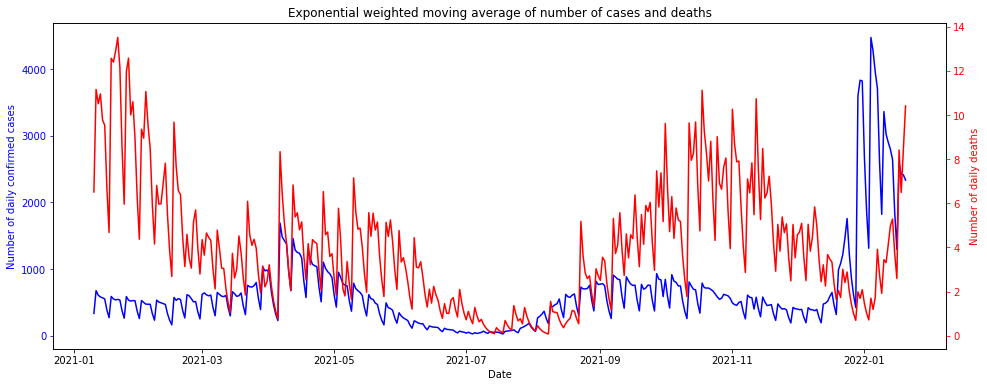

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, filtered_bc_df.index, filtered_bc_df['new_cases_ewm'], "blue", "Date", "Number of daily confirmed cases")
# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()
# Plot the relative temperature data in red
plot_timeseries(ax2, filtered_bc_df.index, filtered_bc_df['deaths_ewm'], "red", "Date", "Number of daily deaths")
ax.set_title("Exponential weighted moving average of number of cases and deaths")
plt.show()

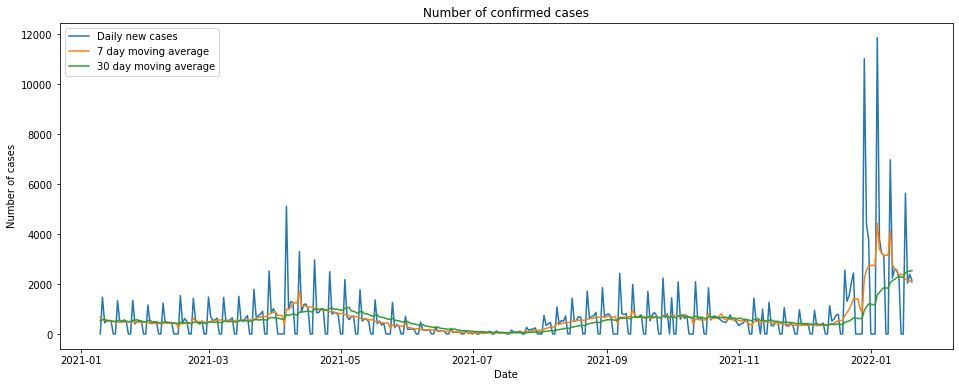

In [42]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(filtered_bc_df.index, filtered_bc_df['daily_new_cases'], label="Daily new cases")
ax.plot(filtered_bc_df.index, filtered_bc_df['new_cases_ma_7'], label="7 day moving average")
ax.plot(filtered_bc_df.index, filtered_bc_df['new_cases_ma_30'], label="30 day moving average")
ax.set_xlabel("Date")
ax.set_ylabel("Number of cases")
ax.set_title("Number of confirmed cases")
ax.legend()

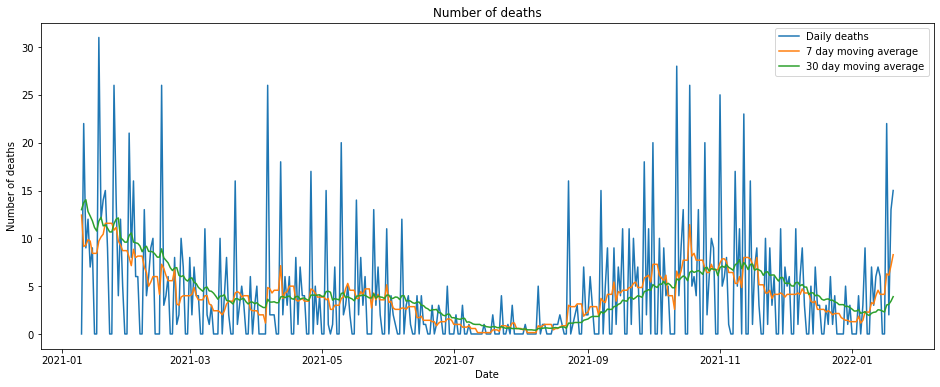

In [44]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(filtered_bc_df.index, filtered_bc_df['daily_deaths'], label="Daily deaths")
ax.plot(filtered_bc_df.index, filtered_bc_df['deaths_ma_7'], label="7 day moving average")
ax.plot(filtered_bc_df.index, filtered_bc_df['deaths_ma_30'], label="30 day moving average")
ax.set_xlabel("Date")
ax.set_ylabel("Number of deaths")
ax.set_title("Number of deaths")
ax.legend()

### Province wide trends

In [20]:
top_provinces = pd.read_csv('../data/processed/top_provinces.csv')
top_provinces.head()

,Province/State,1/20/22
0,Quebec,12639
1,Ontario,10702
2,Alberta,3421
3,British Columbia,2520
4,Manitoba,1485


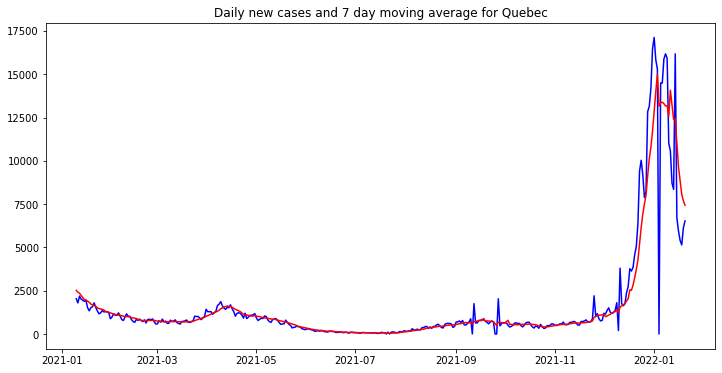

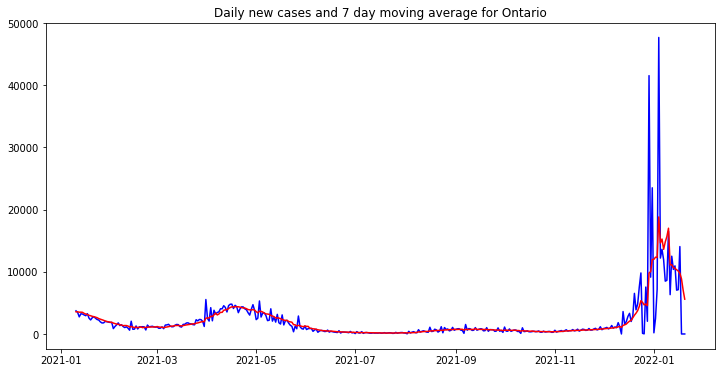

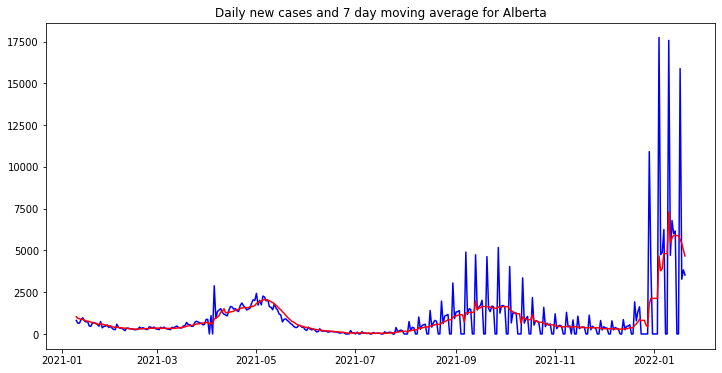

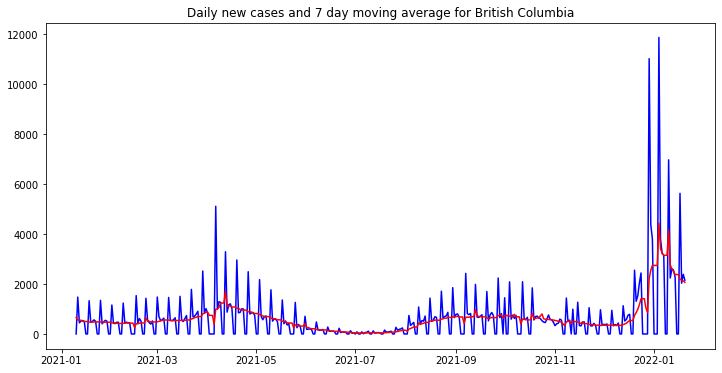

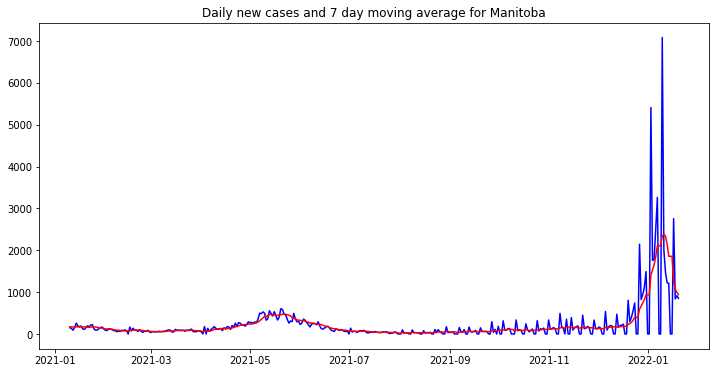

In [33]:
for i in range(5):
    province = top_provinces.iloc[i, 0]
    file_name = province + '_combined.csv'
    province_df = pd.read_csv('../data/processed/'+file_name, index_col='Date', parse_dates=['Date'])
    province_filtered = province_df[start_date:end_date]
    
    plt.figure(figsize=(12,6))
    plt.plot(province_filtered.index, province_filtered['daily_new_cases'], 'b',
            province_filtered.index, province_filtered['new_cases_ma_7'], 'r')
    plt.title("Daily new cases and 7 day moving average for " + province)

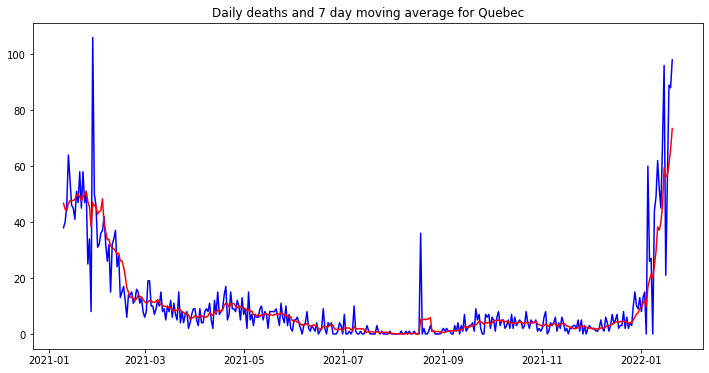

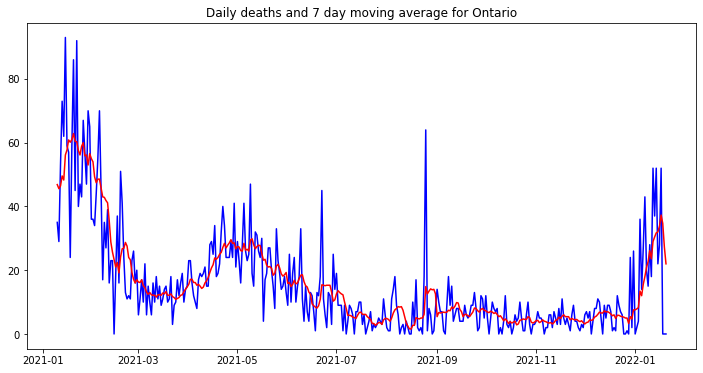

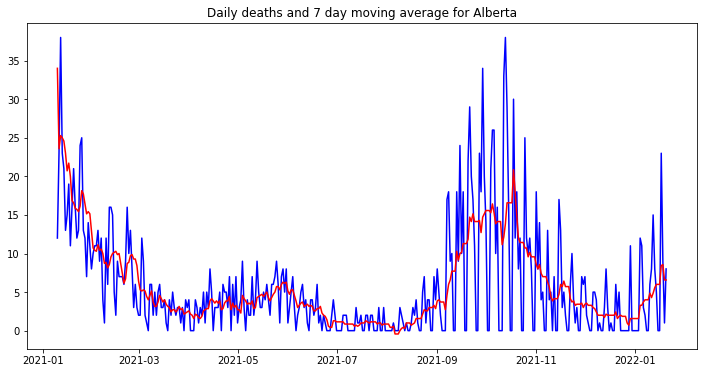

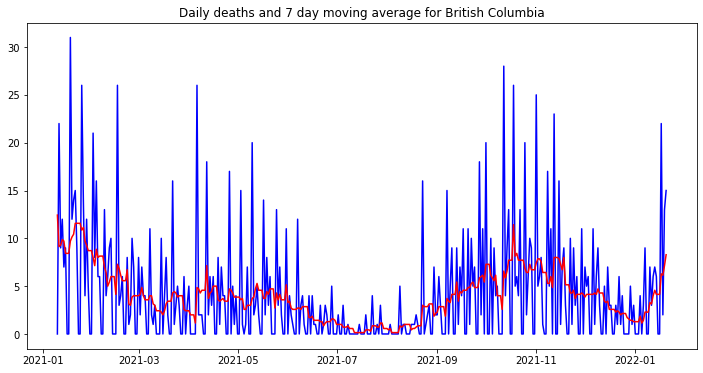

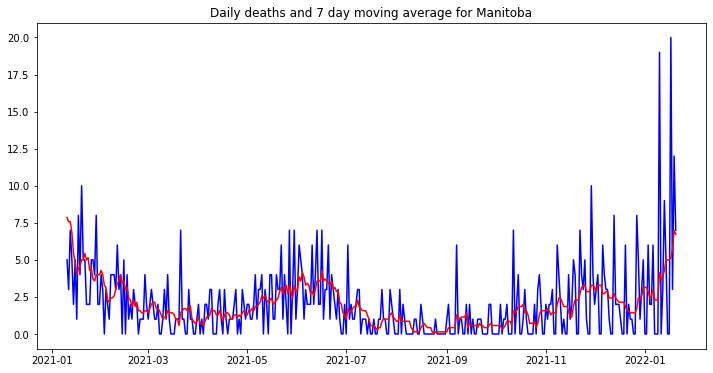

In [34]:
for i in range(5):
    province = top_provinces.iloc[i, 0]
    file_name = province + '_combined.csv'
    province_df = pd.read_csv('../data/processed/'+file_name, index_col='Date', parse_dates=['Date'])
    province_filtered = province_df[start_date:end_date]
    
    plt.figure(figsize=(12,6))
    plt.plot(province_filtered.index, province_filtered['daily_deaths'], 'b',
            province_filtered.index, province_filtered['deaths_ma_7'], 'r')
    plt.title("Daily deaths and 7 day moving average for " + province)